In [20]:
# mounting the Google Drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [22]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import librosa
import librosa.display
import os
import tensorflow as tf

In [23]:
dataset_path = "/content/drive/My Drive/APS360 Group Project/data_testing/resized_mfcc_wo_spanish/"

In [24]:
def generate_data_image(dataset_path):
  data_transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(128)])
  train_data = torchvision.datasets.ImageFolder(root=os.path.join(dataset_path,'train'), transform=data_transform)
  test_data = torchvision.datasets.ImageFolder(root=os.path.join(dataset_path,'test'), transform=data_transform)
  val_data = torchvision.datasets.ImageFolder(root=os.path.join(dataset_path,'validation'), transform=data_transform)

  return train_data, val_data, test_data

def visualize_image_data(dataset):
  batch = 27
  num_workers = 1

  data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch, num_workers=num_workers, shuffle=True)

  # Visualize some sample data
  classes = ["mandarin", "india", "english"]

  # obtain one batch of training images
  dataiter = iter(data_loader)
  images, labels = dataiter.next()
  images = images.numpy() # convert images to numpy for display
  print(images.shape)
  # plot the images in the batch, along with the corresponding labels
  fig = plt.figure(figsize=(25, 4))
  for idx in np.arange(20):
      ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      ax.set_title(classes[labels[idx]])
  return(images.shape)

# can also load in data as numpy arrays directly 
def numpy_loader(input):
    item = np.load(input)
    return item

def generate_data_numpy():
  data_transform = transforms.Compose([transforms.ToTensor()])
  data = torchvision.datasets.DatasetFolder(root='/content/drive/My Drive/APS360 Group Project/data_testing/resized_mfcc_wo_spanish/', loader=numpy_loader,extensions='.npy',transform=data_transform)
  return data

def visualize_numpy_data(dataset):
    batch = 27
    num_workers = 1

    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch, num_workers=num_workers, shuffle=True)

    # Visualize some sample data
    classes = ['mandarin', 'india', 'english']

    # obtain one batch of training images
    dataiter = iter(data_loader)
    array, labels = dataiter.next()
    array = array.numpy() # convert images to numpy for display
    plt.figure()
    librosa.display.specshow(array[0].reshape(128,128))
    plt.colorbar()

(27, 3, 128, 128)


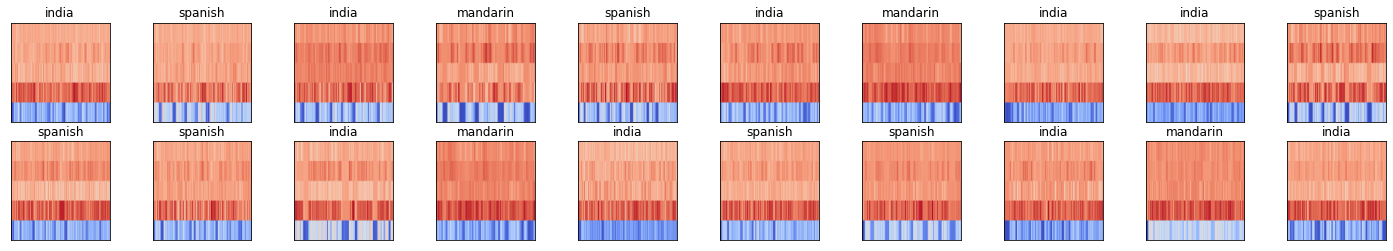

In [25]:
train_data, val_data, test_data= generate_data_image(dataset_path)
dims = visualize_image_data(train_data)

In [26]:
list_train = list(train_data)

In [42]:
new = []
for i in range(0, len(list_train)):
  temp = list(list_train[i])
  temp1 = temp[0].numpy()
  new.append(temp1)

data = np.array(new)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(1030, 3, 128, 128)


In [92]:
batch = 1000
num_workers = 1

data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch, num_workers=num_workers, shuffle=True)

# Visualize some sample data
classes = ['mandarin', 'india', 'english']

# obtain one batch of training images
dataiter = iter(data_loader)
array, labels = dataiter.next()
array = array.numpy()
labels = labels.numpy()

In [93]:
print(array.shape)
print(labels.shape)

(1000, 3, 128, 128)
(1000,)


In [59]:
print (array[0][2][1][1])

0.569087


In [94]:
new_array = []
for i in range(0,1000):
  new_array.append([])
  for j in range(0,1):
    for k in range(0, 128):
      for h in range(0, 128):
        new_array[i].append(array[i][j][k][h])

In [95]:
new_array = np.array(new_array)
print(new_array.shape)

(1000, 16384)


In [96]:
feat_cols = [ 'pixel'+str(i) for i in range(new_array.shape[1]) ]
df = pd.DataFrame(new_array, columns = feat_cols)
df['y'] = labels
df['label'] = df ['y'].apply(lambda i: str(i))

#new_array, labels = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (1000, 16386)


In [97]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

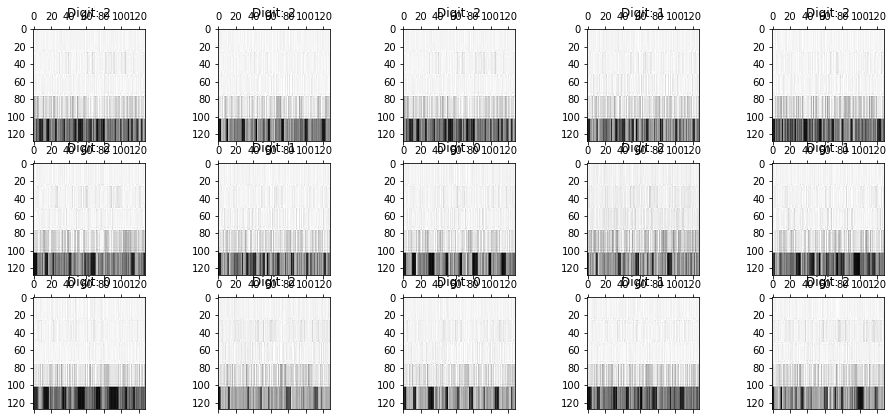

In [98]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((128,128)).astype(float))
plt.show()

In [99]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.19331174 0.0636191  0.04630229]


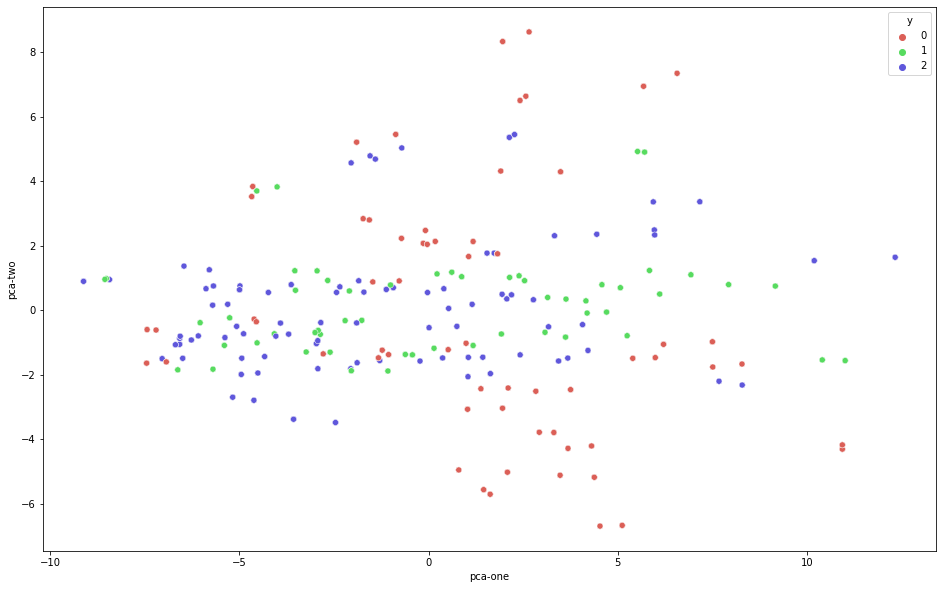

In [103]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df.loc[rndperm,:],
    legend="full"
)

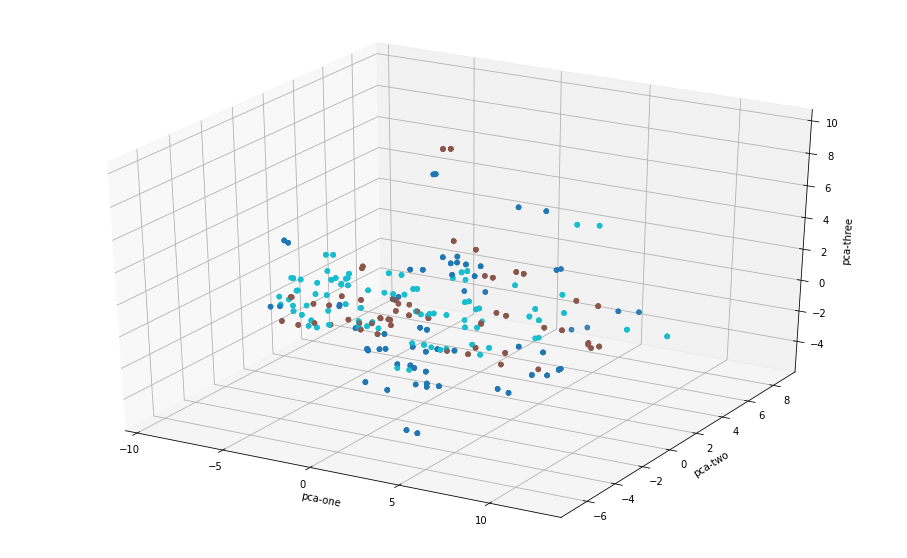

In [104]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()